# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
import itertools

In [4]:
from spectral_connectivity import Multitaper, Connectivity
import spectral_connectivity

## Inputs & Data

Explanation of each input and where it comes from.

In [5]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [6]:
CHANNEL_MAP_AND_ALL_TRIALS_DF = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")
MERGED_TRIALS_AND_VIDEO = pd.read_pickle("./proc/trial_SLEAP_and_metadata.pkl")

In [7]:
OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

In [8]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [9]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
TIME_WINDOW_STEP = 0.5
RESAMPLE_RATE=1000

In [10]:
MERGED_TRIALS_AND_VIDEO

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,baseline_thorax_velocity,trial_thorax_velocity,trial_chunked_thorax_velocity,baseline_chunked_thorax_velocity,trial_chunked_ephys_timestamp,baseline_chunked_ephys_timestamp,trial_chunked_lfp_index,baseline_chunked_lfp_index,binned_baseline_thorax_velocity,binned_trial_thorax_velocity
0,30950500,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,27998597,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[1.2476140081638165, 1.1366289071218907, 1.068...","[0.18170472850681613, 0.16961378983662276, 0.2...","[0.49872187702582166, 0.5847505450273386, 1.07...","[1.6838472335457935, 1.7550373254126983, 1.372...","[(27998597, 28018597), (28008597, 28028597), (...","[(27798597, 27818597), (27808597, 27828597), (...","[(1399929, 1400929), (1400429, 1401429), (1400...","[(1389929, 1390929), (1390429, 1391429), (1390...","[0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ..."
1,32550496,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,29598593,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[2.7236727895073223, 2.628037603947678, 2.5298...","[0.38577700470932025, 0.16352840888997497, 0.0...","[0.3129891797005337, 0.2588847730730972, 0.210...","[1.458421075097482, 0.5407183310858753, 0.2360...","[(29598593, 29618593), (29608593, 29628593), (...","[(29398593, 29418593), (29408593, 29428593), (...","[(1479929, 1480929), (1480429, 1481429), (1480...","[(1469929, 1470929), (1470429, 1471429), (1470...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,34350494,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,31398591,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[5.210405290871598, 5.31421978904958, 5.379251...","[0.16560567036540477, 0.1278165569746918, 0.09...","[0.19868857983610794, 0.508612732615851, 0.481...","[3.439626522203859, 1.5683251160952123, 1.1535...","[(31398591, 31418591), (31408591, 31428591), (...","[(31198591, 31218591), (31208591, 31228591), (...","[(1569929, 1570929), (1570429, 1571429), (1570...","[(1559929, 1560929), (1560429, 1561429), (1560...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,35950496,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,32998593,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[1.6555785442563817, 1.6866235492876445, 1.664...","[0.6307901161394641, 0.6655381193431421, 0.701...","[0.4673908122355257, 0.39056964369789443, 0.38...","[0.900289992310536, 0.3533926495729531, 0.2807...","[(32998593, 33018593), (33008593, 33028593), (...","[(32798593, 32818593), (32808593, 32828593), (...","[(1649929, 1650929), (1650429, 1651429), (1650...","[(1639929, 1640929), (1640429, 1641429), (1640...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,37450494,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,34498591,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.9562352171082348, 0.8615465705681848, 0.756...","[0.15955796441347841, 0.18843088608181321, 0.2...","[0.23449342689004346, 0.17815867178863123, 0.2...","[0.3903027043299651, 0.397100110767035, 0.8705...","[(34498591, 34518591), 

In [11]:
CHANNEL_MAP_AND_ALL_TRIALS_DF

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,LH_baseline_lfp_trace,LH_trial_lfp_trace,MD_baseline_lfp_trace,MD_trial_lfp_trace
0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...","[0.6927297, 0.96389693, 0.7884358, -0.04101689...","[-0.06969439, -0.09568214, -0.05315674, 0.1571...","[1.5864334, 1.5710771, 1.5970649, 1.2155175, 0...","[2.0367627, 2.1163385, 2.1618104, 2.2679114, 2...","[0.3164087, 0.36377528, 0.18757163, -0.5020857...","[3.1382985, 3.2319791, 3.2788196, 3.2881875, 3...","[0.8118982, 1.2209699, 0.87435186, -0.4028264,...","[1.3934726, 1.494771, 1.764077, 1.828315, 1.68...","[-0.9783956, -0.86721426, -0.7288553, -1.40582..."
1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...","[1.0732753, 0.7246318, 0.7633699, 0.3782669, -...","[0.31539667, 0.23152715, 0.29767776, 0.4217101...","[0.03543783, -0.27641505, -0.40044746, -0.6638...","[0.3107247, 0.14209972, -0.05873455, -0.331566...","[0.026525281, -0.04547191, 0.11936376, -0.4092...","[-1.180375, -1.2959143, -1.3771042, -1.458294,...","[0.9492963, 0.46840277, 0.6713773, 0.043717593...","[-0.14577106, -0.16059524, 0.027177656, 0.1680...","[1.6281886, 1.349, 1.4675934, 0.9487473, -0.21..."
2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-1.2669662, -1.2965895, -1.2532939, -0.986684...","[0.28711826, 0.84996116, 1.0960625, 0.8226166,...","[-1.2556804, -1.2580429, -1.3312811, -1.118654...","[0.060244307, 0.4748669, 0.7654571, 0.6591436,...","[-1.9912907, -1.9041362, -1.9325562, -1.542255...","[0.69344664, 1.4001559, 1.7582471, 1.4304705, ...","[-0.19985186, -0.074944444, -0.18423842, -0.13...","[-0.59643286, 0.27167362, 0.6901134, 0.4371759...","[-0.32119048, -0.52872896, -0.96851283, -0.753...","[0.096357144, 0.88450915, 1.2131118, 0.8943919..."
3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,20221202_134600_omission_and_competition_subje...,...,"[-2.0257788, -2.0348935, -1.9323514, -1.754611...","[2.376701, 2.3015034, 1.7796774, 0.9411098, 0....","[0.16655779, 0.42879772, 0.66268736, 0.6934002...","[-1.8427671, -2.303459, -2.6802812, -3.060647,...","[-1.2637402, -1.0382752, -0.82986236, -0.74649...","[2.6771586, 2.3929594, 2.209177, 1.9761335, 1....","[-2.538743, -2.1983705, -1.8673657, -1.7143542...","[2.8447661, 2.3045416, 1.5301157, 0.96490973, ...","[-2.7647088, -2.5546997, -2.3051593, -2.055619...","[2.087738, 1.7418406, 1.1266373, 0.45954946, 0..."
4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-0.5765152, 0.25749493, 0.6403192, 0.4375135,...","[-0.043295607, 0.73602533, 0.31674156, 0.07747...","[-0.31421542, 0.19727057, 0.4453354, 0.3744597...","[0.21617076, 0.8221576, 0.58236164, 0.43116024...","[-2.1352851, -2.0576038, -2.0822346, -2.140969...","[-0.18188764, 0.113

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [12]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [13]:
CHANNEL_MAP_AND_ALL_TRIALS_DF.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'vHPC_baseline_lfp_trace', 'vHPC_trial_lfp_trace',
       'BLA_baseline_lfp_trace', 'BLA_trial_lfp_trace',
       'LH_baseline_lfp_trace', 'LH_trial_lfp_trace', 'MD_baseline_lfp_trace',
       'MD_trial_lfp_trace'],
      dtype='object')

In [14]:
MERGED_TRIALS_AND_VIDEO.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'file_path', 'start_frame', 'stop_frame', 'individual_subj', 'all_subj',
       'recording_name', 'track_names', 'subject_id', 'corner_path',
       'corner_parts', 'bottom_width', 'top_width', 'right_height',
       'left_height', 'average_height', 'average_width', 'width_ratio',
       'height_ratio', 'rescaled_locations', 'box_bottom_left', 'reward_port',
       'box_top_lef

In [15]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in CHANNEL_MAP_AND_ALL_TRIALS_DF.columns if col not in merge_columns and col in MERGED_TRIALS_AND_VIDEO.columns]
CHANNEL_MAP_AND_ALL_TRIALS_DF = CHANNEL_MAP_AND_ALL_TRIALS_DF.drop(columns=cols_to_drop)

In [16]:
MERGED_LFP_AND_SLEAP = pd.merge(left=CHANNEL_MAP_AND_ALL_TRIALS_DF, right=MERGED_TRIALS_AND_VIDEO, on=merge_columns, how="right")




In [17]:
MERGED_LFP_AND_SLEAP.head()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,...,baseline_thorax_velocity,trial_thorax_velocity,trial_chunked_thorax_velocity,baseline_chunked_thorax_velocity,trial_chunked_ephys_timestamp,baseline_chunked_ephys_timestamp,trial_chunked_lfp_index,baseline_chunked_lfp_index,binned_baseline_thorax_velocity,binned_trial_thorax_velocity
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.33054966, -0.41988742, -0.9134785, -1.4964...","[0.51145864, 0.29928145, 0.22111093, 0.1116721...","[0.27216667, -0.26033333, -0.8307, -1.0484333,...","[-1.1513833, -1.1845167, -1.14665, -1.1431, -1...","[-0.6486342, -0.79189086, -1.2833407, -1.73499...","[-0.44369763, -0.31436872, 0.01790708, 0.39395...",...,"[1.2476140081638165, 1.1366289071218907, 1.068...","[0.18170472850681613, 0.16961378983662276, 0.2...","[0.49872187702582166, 0.5847505450273386, 1.07...","[1.6838472335457935, 1.7550373254126983, 1.372...","[(27998597, 28018597), (28008597, 28028597), (...","[(27798597, 27818597), (27808597, 27828597), (...","[(1399929, 1400929), (1400429, 1401429), (1400...","[(1389929, 1390929), (1390429, 1391429), (1390...","[0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ..."
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...","[0.32384935, 0.1630414, 0.0044668876, 0.062536...","[1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...","[-1.0224, -0.9159, -0.9963667, -0.9774333, -0....","[0.85755014, 0.8535708, 0.83964306, 0.93116814...","[1.1042699, 0.9152507, 0.29447198, -0.3024307,...",...,"[2.7236727895073223, 2.628037603947678, 2.5298...","[0.38577700470932025, 0.16352840888997497, 0.0...","[0.3129891797005337, 0.2588847730730972, 0.210...","[1.458421075097482, 0.5407183310858753, 0.2360...","[(29598593, 29618593), (29608593, 29628593), (...","[(29398593, 29418593), (29408593, 29428593), (...","[(1479929, 1480929), (1480429, 1481429), (1480...","[(1469929, 1470929), (1470429, 1471429), (1470...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.23897848, 0.36181787, 0.122839406, -0.1474...","[-0.14964072, 0.4355215, 0.6074967, 0.317149, ...","[-1.0034667, -0.7076333, -0.69816667, -0.67923...","[0.48753333, 0.355, 0.19643334, 0.18696667, 0....","[-1.1341151, -0.62276846, -0.70235544, -0.6844...","[-0.51532596, 0.051731564, 0.16713275, 0.09152...",...,"[5.210405290871598, 5.31421978904958, 5.379251...","[0.16560567036540477, 0.1278165569746918, 0.09...","[0.19868857983610794, 0.508612732615851, 0.481...","[3.439626522203859, 1.5683251160952123, 1.1535...","[(31398591, 31418591), (31408591, 31428591), (...","[(31198591, 31218591), (31208591, 31228591), (...","[(1569929, 1570929), (1570429, 1571429), (1570...","[(1559929, 1560929), (1560429, 1561429), (1560...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.49582452, 0.18537582, 0.4042533, 0.24344537...","[-0.33948344, 0.01786755, 0.13624007, -0.12060...","[0.6023167, 0.48398334, 0.22601667, 0.04496666...","[0.1704, 0.059166666, -0.13845, -0.35026667, -...","[0.029845133, -0.6247581, -0.74413866, -0.3820...","[-1.1639602, -1.1440635, -1.1201873, -1.038610...",...,"[1.6555785442563817, 1.6866235492876445, 1.664...","[0.6307901161394641, 0.6655381193431421, 0.701...","[0.4673908122355257, 0.39056964369789443, 0.38...","[0.900289992310536, 0.3533926495729531, 0.2807...","[(32998593, 33018593), (33008593, 33028593), (...","[(32798593, 32818593), (32808593, 32828593), (...","[(1649929, 1650929), (1650429, 1651429), (1650...","[(1639929, 1640929), (1640429, 1641429), (1640...","[0, 0, 0, 0

- Calcuating the power at each frequency band

In [18]:
trace_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trace" in col]

In [19]:
"time_window_step".upper()

'TIME_WINDOW_STEP'

In [20]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_lfp_trace".format(region_and_baseline_or_trial)].apply(lambda x: Multitaper(time_series=x, sampling_frequency=RESAMPLE_RATE, time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT,                                                                              time_window_duration=TIME_WINDOW_DURATION, time_window_step=TIME_WINDOW_STEP                                                                                                                                         ))

In [21]:
for col in trace_columns:
    print(col)
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)].apply(lambda x: Connectivity.from_multitaper(x))

mPFC_baseline_lfp_trace
mPFC_trial_lfp_trace
vHPC_baseline_lfp_trace
vHPC_trial_lfp_trace
BLA_baseline_lfp_trace
BLA_trial_lfp_trace
LH_baseline_lfp_trace
LH_trial_lfp_trace
MD_baseline_lfp_trace
MD_trial_lfp_trace


In [22]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_frequencies".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.frequencies)

In [23]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.power().squeeze())

In [25]:
MERGED_LFP_AND_SLEAP

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,...,mPFC_baseline_all_window_power,mPFC_trial_all_window_power,vHPC_baseline_all_window_power,vHPC_trial_all_window_power,BLA_baseline_all_window_power,BLA_trial_all_window_power,LH_baseline_all_window_power,LH_trial_all_window_power,MD_baseline_all_window_power,MD_trial_all_window_power
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.33054966, -0.41988742, -0.9134785, -1.4964...","[0.51145864, 0.29928145, 0.22111093, 0.1116721...","[0.27216667, -0.26033333, -0.8307, -1.0484333,...","[-1.1513833, -1.1845167, -1.14665, -1.1431, -1...","[-0.6486342, -0.79189086, -1.2833407, -1.73499...","[-0.44369763, -0.31436872, 0.01790708, 0.39395...",...,"[[0.009823293555262794, 0.013924021048577154, ...","[[0.003615743090164337, 0.020784870210994073, ...","[[0.004182283533414606, 0.004589243208990474, ...","[[0.011697103017073326, 0.03404168621796775, 0...","[[0.005353983454892757, 0.01006784871417599, 0...","[[0.0019678294433681668, 0.003568165862318084,...","[[0.014156556290954811, 0.015811485476915764, ...","[[0.01740978843109557, 0.015614214245673032, 0...","[[0.032420332093765145, 0.02588818663960985, 0...","[[0.001126425519817756, 0.0051790350768731565,..."
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...","[0.32384935, 0.1630414, 0.0044668876, 0.062536...","[1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...","[-1.0224, -0.9159, -0.9963667, -0.9774333, -0....","[0.85755014, 0.8535708, 0.83964306, 0.93116814...","[1.1042699, 0.9152507, 0.29447198, -0.3024307,...",...,"[[0.024759951820400854, 0.021303476025368605, ...","[[0.005252625251440256, 0.009544076854592055, ...","[[0.002096892191184231, 0.013303788944311482, ...","[[0.02194185695245405, 0.019980301951269416, 0...","[[0.008392790045477449, 0.009164992589423358, ...","[[0.011354971394795787, 0.02494881560604016, 0...","[[0.009203195865696318, 0.012369094785452853, ...","[[0.004755250402581861, 0.015413926822757013, ...","[[0.029927421519669848, 0.021055238070196908, ...","[[0.005268082999020396, 0.01164688053394768, 0..."
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.23897848, 0.36181787, 0.122839406, -0.1474...","[-0.14964072, 0.4355215, 0.6074967, 0.317149, ...","[-1.0034667, -0.7076333, -0.69816667, -0.67923...","[0.48753333, 0.355, 0.19643334, 0.18696667, 0....","[-1.1341151, -0.62276846, -0.70235544, -0.6844...","[-0.51532596, 0.051731564, 0.16713275, 0.09152...",...,"[[0.011362483623005544, 0.00842350511603944, 0...","[[0.008142487608192315, 0.005764882508257109, ...","[[0.0016166978337783084, 0.005705520165816951,...","[[0.04982180678916146, 0.032510780389063056, 0...","[[0.005384772975860021, 0.003902799415786651, ...","[[0.04033438993135537, 0.030887886395683174, 0...","[[0.02097411820985093, 0.012691784633844525, 0...","[[0.05102492929045597, 0.03262755069515353, 0....","[[0.019964179520096176, 0.0115436746873894, 0....","[[0.03412912947336931, 0.023354876559489354, 0..."
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.49582452, 0.18537582, 0.4042533, 0.24344537...","[-0.33948344, 0.01786755, 0.13624007, -0.12060...","[0.6023167, 0.48398334, 0.22601667, 0.04496666...","[0.1704, 0.059166666, -0.13845, -0.35026667, -...","[0.029845133, -0.6247581, -0.74413866, -0.3820...","[-1.1639602, -1.1440635, -1.1201873, -1.038610...",...,"[[0.006542340959047896, 0.004409322903575986, ...","[[0.0017563036283226264, 0.0012924743905227834...","[[0.023311719774968133, 0.016007367431799868, ...","[[0.003256334458860641, 0.0053025934708259715,...","[[0.011390110949094753, 0.012101279184300179, ...","[[0.008089393889266917, 0.010055278188354798, ...","[[0.005229034265379665, 0.004547139730694433, ...","[[0.003590199461878245, 0.0042194869616777545,...","[[0.0046146

# Parsing by velocity

In [88]:
baseline_windowed_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "baseline_all_window_power" in col]
trial_windowed_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trial_all_window_power" in col]

In [89]:
trial_windowed_power_columns

['mPFC_trial_all_window_power',
 'vHPC_trial_all_window_power',
 'BLA_trial_all_window_power',
 'LH_trial_all_window_power',
 'MD_trial_all_window_power']

In [90]:
for col in baseline_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array(x[col]).mean(axis=0), axis=1)

In [91]:
for col in trial_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array(x[col]).mean(axis=0), axis=1)

- Getting a mask for each segment based on velocity

In [92]:
all_bins = set(x for lst in MERGED_LFP_AND_SLEAP["binned_baseline_thorax_velocity"] for x in lst)

In [93]:
all_bins

{0, 1, 2, 3}

In [94]:
all_bin_df = []
for bin in all_bins:
    current_df = MERGED_LFP_AND_SLEAP.copy()
    current_df["binned_trial_velocity_mask"] = current_df["binned_trial_thorax_velocity"].apply(lambda x: [index for index, num in enumerate(x) if num == bin])
    current_df["binned_baseline_velocity_mask"] = current_df["binned_baseline_thorax_velocity"].apply(lambda x: [index for index, num in enumerate(x) if num == bin])
    for col in baseline_windowed_power_columns:
        region_and_baseline_or_trial = "_".join(col.split("_")[:2])
        current_df["{}_velocity_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = current_df.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_baseline_velocity_mask"]]), axis=0), axis=1)

    for col in trial_windowed_power_columns:
        region_and_baseline_or_trial = "_".join(col.split("_")[:2])
        current_df["{}_velocity_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = current_df.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_trial_velocity_mask"]]), axis=0), axis=1)
    
    current_df["velocity_bin"] = bin
    all_bin_df.append(current_df)
        
    
    


In [97]:
MERGED_LFP_AND_SLEAP = pd.concat(all_bin_df).reset_index(drop=True)

## Plotting all the lower velocities together

In [102]:
window_averaged_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "velocity_parsed_window_averaged_power" in col]

In [103]:
window_averaged_power_columns

['mPFC_baseline_velocity_parsed_window_averaged_power',
 'vHPC_baseline_velocity_parsed_window_averaged_power',
 'BLA_baseline_velocity_parsed_window_averaged_power',
 'LH_baseline_velocity_parsed_window_averaged_power',
 'MD_baseline_velocity_parsed_window_averaged_power',
 'mPFC_trial_velocity_parsed_window_averaged_power',
 'vHPC_trial_velocity_parsed_window_averaged_power',
 'BLA_trial_velocity_parsed_window_averaged_power',
 'LH_trial_velocity_parsed_window_averaged_power',
 'MD_trial_velocity_parsed_window_averaged_power']

- Grouping by trial outcome

In [104]:
MERGED_LFP_AND_SLEAP

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,...,vHPC_baseline_all_window_averaged_power,BLA_baseline_all_window_averaged_power,LH_baseline_all_window_averaged_power,MD_baseline_all_window_averaged_power,mPFC_trial_all_window_averaged_power,vHPC_trial_all_window_averaged_power,BLA_trial_all_window_averaged_power,LH_trial_all_window_averaged_power,MD_trial_all_window_averaged_power,velocity_bin
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.33054966, -0.41988742, -0.9134785, -1.4964...","[0.51145864, 0.29928145, 0.22111093, 0.1116721...","[0.27216667, -0.26033333, -0.8307, -1.0484333,...","[-1.1513833, -1.1845167, -1.14665, -1.1431, -1...","[-0.6486342, -0.79189086, -1.2833407, -1.73499...","[-0.44369763, -0.31436872, 0.01790708, 0.39395...",...,"[0.007338252748333259, 0.01089563666395944, 0....","[0.013091607841038322, 0.014117608416465038, 0...","[0.022964455789557244, 0.022290898817971163, 0...","[0.02557420165245759, 0.026540399430798854, 0....","[0.013578532216685993, 0.01736326663715145, 0....","[0.005884176938003947, 0.01262773509768471, 0....","[0.016782418918595676, 0.015240122116290227, 0...","[0.03241093477294236, 0.03003938250305729, 0.0...","[0.02394606557277414, 0.024972355567400052, 0....",0
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...","[0.32384935, 0.1630414, 0.0044668876, 0.062536...","[1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...","[-1.0224, -0.9159, -0.9963667, -0.9774333, -0....","[0.85755014, 0.8535708, 0.83964306, 0.93116814...","[1.1042699, 0.9152507, 0.29447198, -0.3024307,...",...,"[0.006520190897142798, 0.009908554975019851, 0...","[0.006274318131038264, 0.00691078513224769, 0....","[0.01052940561515397, 0.011517583637301586, 0....","[0.013189469018915191, 0.012605535448486686, 0...","[0.005072513655663902, 0.0071730776351884, 0.0...","[0.017807810758419772, 0.02051735783988241, 0....","[0.0075150800916258895, 0.012030467854449603, ...","[0.003644272984766944, 0.005808118645131345, 0...","[0.006489759161394153, 0.007582477136466669, 0...",0
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.23897848, 0.36181787, 0.122839406, -0.1474...","[-0.14964072, 0.4355215, 0.6074967, 0.317149, ...","[-1.0034667, -0.7076333, -0.69816667, -0.67923...","[0.48753333, 0.355, 0.19643334, 0.18696667, 0....","[-1.1341151, -0.62276846, -0.70235544, -0.6844...","[-0.51532596, 0.051731564, 0.16713275, 0.09152...",...,"[0.013600617428570527, 0.019533499354359572, 0...","[0.006141355758002356, 0.009303619594021637, 0...","[0.007468537947027687, 0.010884286729309219, 0...","[0.004814152657455484, 0.006184218967929381, 0...","[0.01043389231412404, 0.011229291113011746, 0....","[0.018798404711232963, 0.024949532187259045, 0...","[0.009525639680784495, 0.010941343792716796, 0...","[0.016095087975310174, 0.015224296452442521, 0...","[0.011809376046566988, 0.010816138136563104, 0...",0
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.49582452, 0.18537582, 0.4042533, 0.24344537...","[-0.33948344, 0.01786755, 0.13624007, -0.12060...","[0.6023167, 0.48398334, 0.22601667, 0.04496666...","[0.1704, 0.059166666, -0.13845, -0.35026667, -...","[0.029845133, -0.6247581, -0.74413866, -0.3820...","[-1.1639602, -1.1440635, -1.1201873, -1.038610...",...,"[0.01636629887281683, 0.024804479917894477, 0....","[0.00689989260430601, 0.009437438029868149, 0....","[0.010951516062517489, 0.010717930878165088, 0...","[0.008629680530200008, 0.008992947836672616, 0...","[0.006360855718027482, 0.007822405773560855, 0...","[0.0164348816792982, 0.024643952502461323, 0.0...","[0.00733101472807534, 0.00976732655872932, 0.0...","[0.00947190548027983, 0.009763030808051793, 0....","[0.008773587979931309, 0.01012670187919228, 0....",0
4,37450494,20221214_125409_om_and_comp_6_1_to

In [105]:
grouped_all_trials_df = MERGED_LFP_AND_SLEAP.groupby(['trial_outcome', 'velocity_bin']).agg({k: lambda x: np.vstack([arr for arr in x.tolist() if not np.any(np.isnan(arr))]) for k in window_averaged_power_columns}).reset_index()

In [106]:
grouped_all_trials_df = pd.melt(grouped_all_trials_df, id_vars =['trial_outcome', 'velocity_bin'], value_vars =grouped_all_trials_df.drop(columns=["trial_outcome", "velocity_bin"]).columns, value_name="power", var_name="region_and_baseline_or_trial") 

In [119]:
grouped_all_trials_df

,trial_outcome,velocity_bin,region_and_baseline_or_trial,power
0,lose,0,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.020090183352770068, 0.025215370983250298, ..."
1,lose,1,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.012096547095824696, 0.008096570469847445, ..."
2,lose,2,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.006160721145788189, 0.011262819711789785, ..."
3,lose,3,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.01347149329683217, 0.022370986693883776, 0..."
4,omission,0,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.015192233263166573, 0.014732912277589506, ..."
...,...,...,...,...
155,rewarded,3,MD_trial_velocity_parsed_window_averaged_power,"[[0.015432044660759599, 0.012118595270495247, ..."
156,win,0,MD_trial_velocity_parsed_window_averaged_power,"[[0.014378295669285448, 0.015305386679455314, ..."
157,win,1,MD_trial_velocity_parsed_window_averaged_power,"[[0.050735821302542464, 0.05203986845364532, 0..."
158,win,2,MD_trial_velocity_parsed_window_averaged_power,"[[0.04824182039427767, 0.03439085762094281, 0...."


In [120]:
grouped_all_trials_df["brain_region"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [121]:
grouped_all_trials_df["trial_or_baseline"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [122]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [123]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [124]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [125]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

In [126]:
grouped_all_trials_df["trial_outcome"].unique()

array(['lose', 'omission', 'rewarded', 'win'], dtype=object)

In [128]:
grouped_all_trials_df

,trial_outcome,velocity_bin,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,mean_power,std_power,n_trials,sem_power
0,lose,0,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.020090183352770068, 0.025215370983250298, ...",mPFC,baseline,"[0.01829818083990413, 0.025684980963127064, 0....","[0.04178821777900597, 0.0594714958706581, 0.07...","[80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 8...","[0.004672064780621132, 0.006649115374519478, 0..."
1,lose,1,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.012096547095824696, 0.008096570469847445, ...",mPFC,baseline,"[0.013891323249798703, 0.01810956630553882, 0....","[0.014194217471068953, 0.016030849572020483, 0...","[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7...","[0.00169653348085357, 0.00191605300404149, 0.0..."
2,lose,2,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.006160721145788189, 0.011262819711789785, ...",mPFC,baseline,"[0.01699063511668893, 0.019789013383542504, 0....","[0.022813468629735763, 0.021731335050792194, 0...","[56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 5...","[0.0030485779791566575, 0.0029039717970448598,..."
3,lose,3,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.01347149329683217, 0.022370986693883776, 0...",mPFC,baseline,"[0.01363848739064588, 0.016088284862340384, 0....","[0.018175696552898805, 0.01391694709430543, 0....","[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...","[0.003213039571335925, 0.002460191915949447, 0..."
4,omission,0,mPFC_baseline_velocity_parsed_window_averaged_...,"[[0.015192233263166573, 0.014732912277589506, ...",mPFC,baseline,"[0.011957359680896236, 0.014778106544779913, 0...","[0.007554304813450625, 0.007562467102378539, 0...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[0.0017805667202470381, 0.0017824905901973485,..."
...,...,...,...,...,...,...,...,...,...,...
155,rewarded,3,MD_trial_velocity_parsed_window_averaged_power,"[[0.015432044660759599, 0.012118595270495247, ...",MD,trial,"[0.008967613658556896, 0.01086669235121607, 0....","[0.004455846700438424, 0.005154846553345366, 0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[0.002227923350219212, 0.002577423276672683, 0..."
156,win,0,MD_trial_velocity_parsed_window_averaged_power,"[[0.014378295669285448, 0.015305386679455314, ...",MD,trial,"[0.01022638398880001, 0.012749822688856294, 0....","[0.022842571055716885, 0.02372200007590737, 0....","[92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9...","[0.0023815026596199513, 0.0024731894730448544,..."
157,win,1,MD_trial_velocity_parsed_window_averaged_power,"[[0.050735821302542464, 0.05203986845364532, 0...",MD,trial,"[0.01626936967994091, 0.0180048255872293, 0.02...","[0.049089740455076525, 0.043779011858819626, 0...","[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 4...","[0.007085493716546824, 0.006318956070386333, 0..."
158,win,2,MD_trial_velocity_parsed_window_averaged_power,"[[0.04824182039427767, 0.03439085762094281, 0....",MD,trial,"[0.01418130523510523, 0.012864387669837113, 0....","[0.015460371047051075, 0.010549837896057079, 0...","[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...","[0.003155835024947803, 0.00215347664286809, 0...."


# Drawing all velocity bins together for each trial outcome

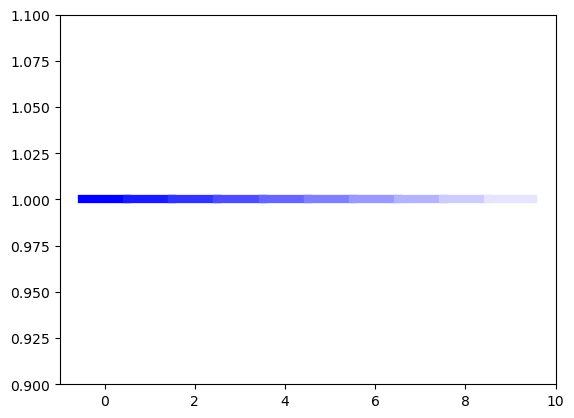

In [139]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def adjust_lightness(color, amount=0.5):
    """
    Adjusts the lightness of the given color by the provided amount.
    :param color: Input color in some format that matplotlib's `to_rgb` can handle.
    :param amount: Amount to adjust. > 1 for lighter, < 1 for darker.
    :return: Adjusted color.
    """
    import colorsys
    c = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(*c)
    return colorsys.hls_to_rgb(h, max(0, min(1, amount * l)), s)

# Original color
original_color = 'blue'  # Can be any color matplotlib understands

# Generate lighter versions
lighter_colors = [adjust_lightness(original_color, amount=1+(0.1*i)) for i in range(10)]

# Plotting to demonstrate the colors
for i, color in enumerate(lighter_colors):
    plt.plot([i-0.5, i+0.5], [1, 1], color=color, linewidth=6)  

plt.ylim(0.9, 1.1)
plt.show()

In [136]:
outcome_df

,trial_outcome,velocity_bin,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,mean_power,std_power,n_trials,sem_power
64,lose,0,MD_baseline_velocity_parsed_window_averaged_power,"[[0.010379779241331858, 0.01627226880204539, 0...",MD,baseline,"[0.030269536895195837, 0.036504951019983425, 0...","[0.14701097308519648, 0.16970257204659853, 0.1...","[80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 8...","[0.016436326462844566, 0.018973324352637495, 0..."
65,lose,1,MD_baseline_velocity_parsed_window_averaged_power,"[[0.029447331919076492, 0.021253653920429338, ...",MD,baseline,"[0.011447451211953051, 0.014755116705866147, 0...","[0.00765018474879355, 0.00937750128328055, 0.0...","[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7...","[0.0009143719678451702, 0.0011208257817846904,..."
66,lose,2,MD_baseline_velocity_parsed_window_averaged_power,"[[0.011306071744683068, 0.014389991423092793, ...",MD,baseline,"[0.016854051865965277, 0.018587680683160492, 0...","[0.043623670648661295, 0.03794063107976448, 0....","[56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 5...","[0.005829458197169897, 0.005070030090659491, 0..."
67,lose,3,MD_baseline_velocity_parsed_window_averaged_power,"[[0.025643478709352883, 0.029585851202558675, ...",MD,baseline,"[0.011496358753458571, 0.013326263974268478, 0...","[0.013930062505904567, 0.011624556950765658, 0...","[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...","[0.0024625104150693975, 0.002054950762043903, ..."
144,lose,0,MD_trial_velocity_parsed_window_averaged_power,"[[0.006007474525527098, 0.007577216616492338, ...",MD,trial,"[0.014411088046556154, 0.01763791294351297, 0....","[0.02533768672137009, 0.026722805141872936, 0....","[81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 8...","[0.002815298524596677, 0.002969200571319215, 0..."
145,lose,1,MD_trial_velocity_parsed_window_averaged_power,"[[0.023316335103614715, 0.02177968950358495, 0...",MD,trial,"[0.01345266305897527, 0.015944174367291303, 0....","[0.010182259472060428, 0.00964596857101568, 0....","[77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...","[0.0011603761590976151, 0.001099260138864497, ..."
146,lose,2,MD_trial_velocity_parsed_window_averaged_power,"[[0.04263619041151166, 0.036998469633354826, 0...",MD,trial,"[0.015623565961212511, 0.01580295553376924, 0....","[0.01964349673631113, 0.013436887079164652, 0....","[65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...","[0.0024364759040923336, 0.001666640722569352, ..."
147,lose,3,MD_trial_velocity_parsed_window_averaged_power,"[[0.002207857711779865, 0.015385282539111582, ...",MD,trial,"[0.01255371847902534, 0.014308976224474669, 0....","[0.014815115917872634, 0.011689158887580701, 0...","[42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...","[0.0022860220162044596, 0.0018036763745928619,..."


In [ ]:
BIN_TO_COLOR = {0: "", 1:, 2:, 3:}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


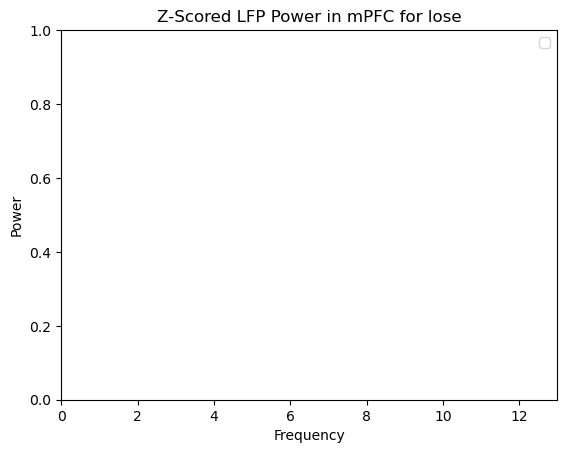

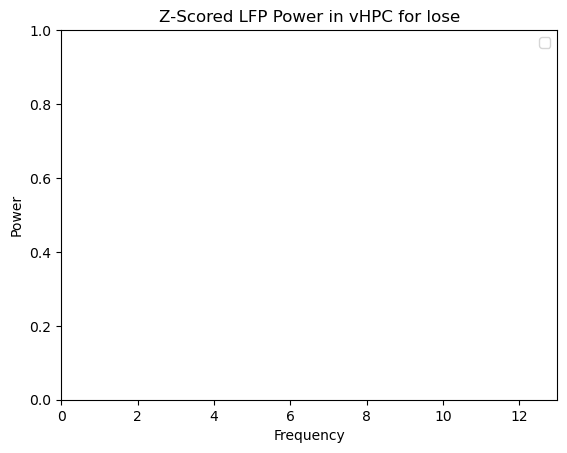

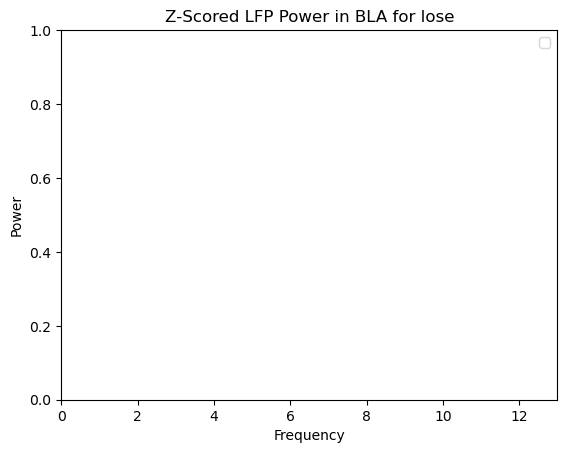

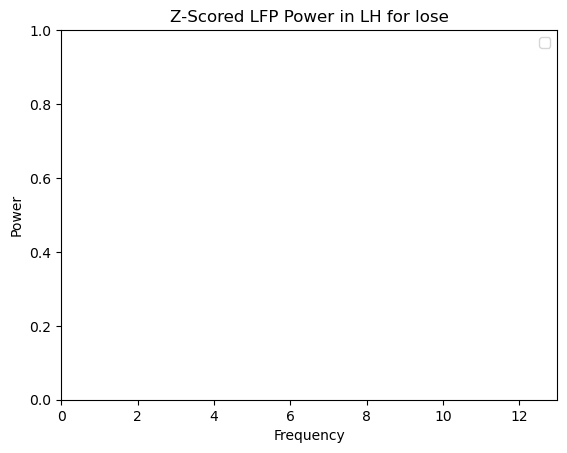

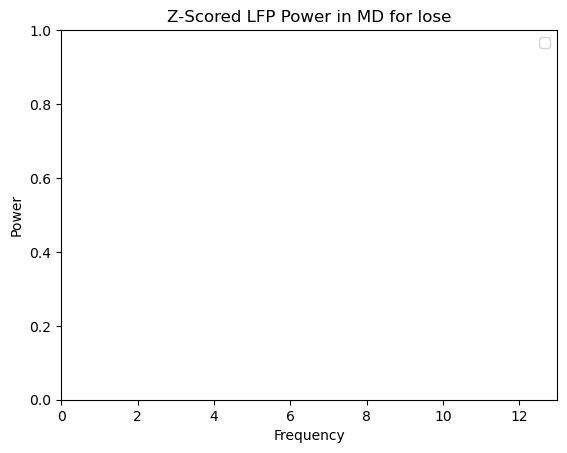

In [135]:
low_freq = 0
high_freq = 13
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]

    for outcome in region_df["trial_outcome"].unique():
        fig, ax = plt.subplots()
        plt.title("Z-Scored LFP Power in {} for {}".format(region.split("_")[-1], outcome))
        plt.xlabel("Frequency")
        plt.ylabel("Power")
        plt.xlim(low_freq, high_freq) 
        # plt.yscale("log")
        # plt.ylim(0, 0.02)
        outcome_df = region_df[(region_df["trial_outcome"] == outcome)]
        break
        for index, row in outcome_df.iterrows():           
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
                
            
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

In [132]:
outcome_df

,trial_outcome,velocity_bin,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,mean_power,std_power,n_trials,sem_power
144,lose,0,MD_trial_velocity_parsed_window_averaged_power,"[[0.006007474525527098, 0.007577216616492338, ...",MD,trial,"[0.014411088046556154, 0.01763791294351297, 0....","[0.02533768672137009, 0.026722805141872936, 0....","[81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 8...","[0.002815298524596677, 0.002969200571319215, 0..."
145,lose,1,MD_trial_velocity_parsed_window_averaged_power,"[[0.023316335103614715, 0.02177968950358495, 0...",MD,trial,"[0.01345266305897527, 0.015944174367291303, 0....","[0.010182259472060428, 0.00964596857101568, 0....","[77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...","[0.0011603761590976151, 0.001099260138864497, ..."
146,lose,2,MD_trial_velocity_parsed_window_averaged_power,"[[0.04263619041151166, 0.036998469633354826, 0...",MD,trial,"[0.015623565961212511, 0.01580295553376924, 0....","[0.01964349673631113, 0.013436887079164652, 0....","[65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...","[0.0024364759040923336, 0.001666640722569352, ..."
147,lose,3,MD_trial_velocity_parsed_window_averaged_power,"[[0.002207857711779865, 0.015385282539111582, ...",MD,trial,"[0.01255371847902534, 0.014308976224474669, 0....","[0.014815115917872634, 0.011689158887580701, 0...","[42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...","[0.0022860220162044596, 0.0018036763745928619,..."


# Drawing plots all together

In [129]:
all_frequencies = MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"].iloc[0]



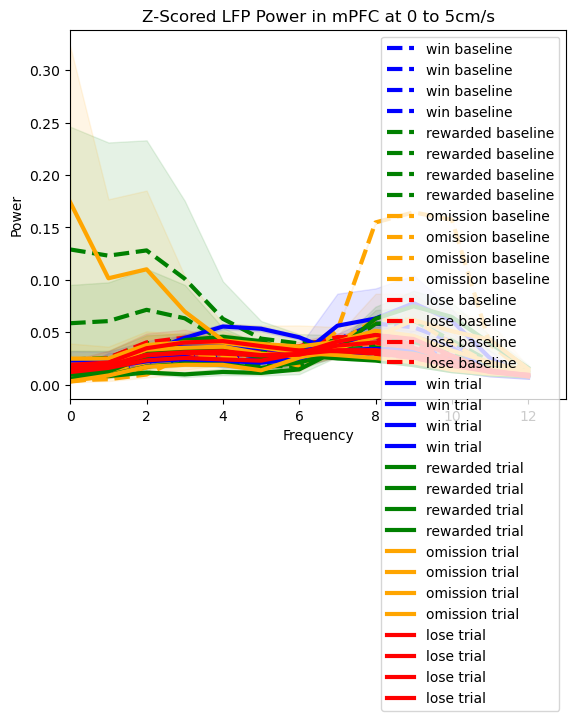

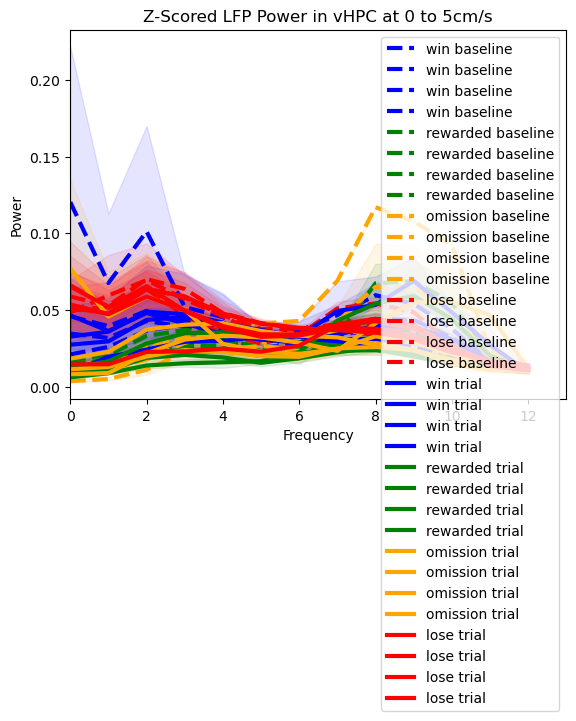

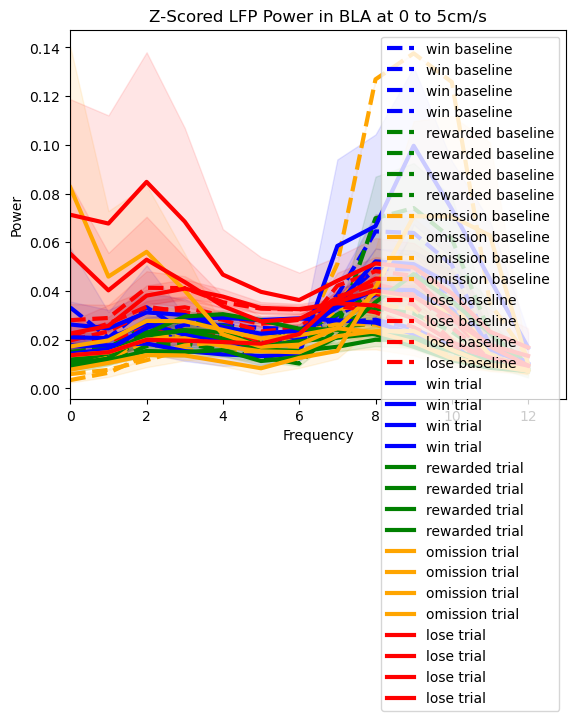

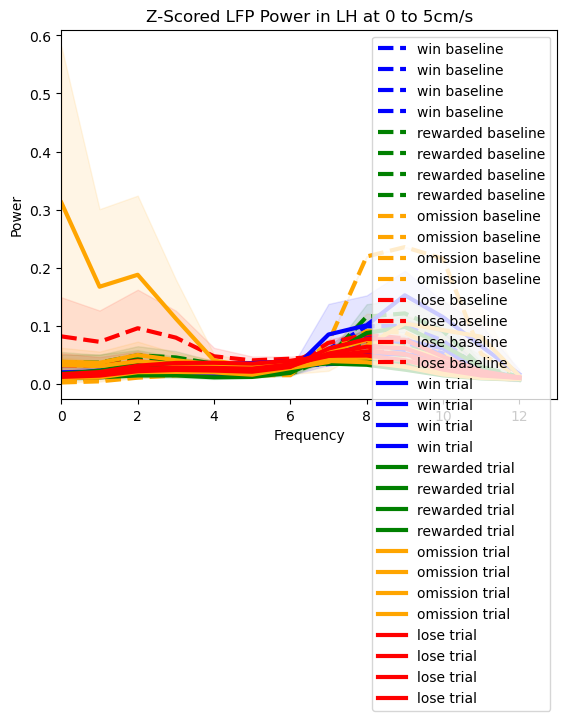

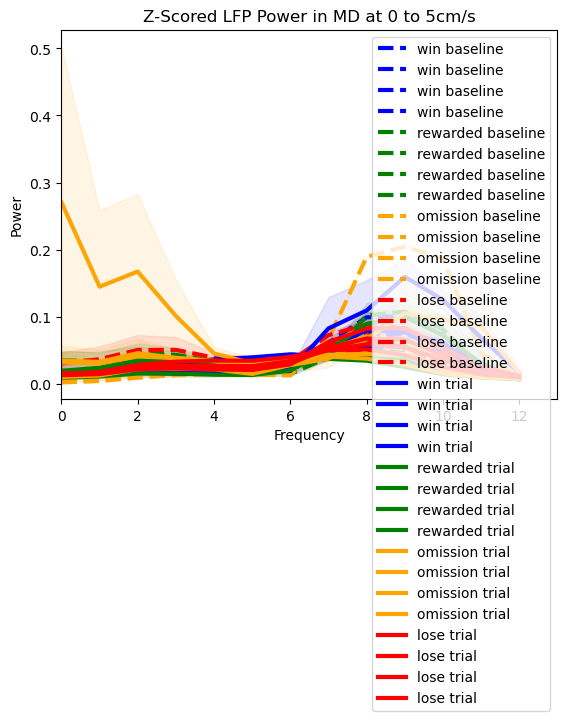

In [130]:
low_freq = 0
high_freq = 13
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

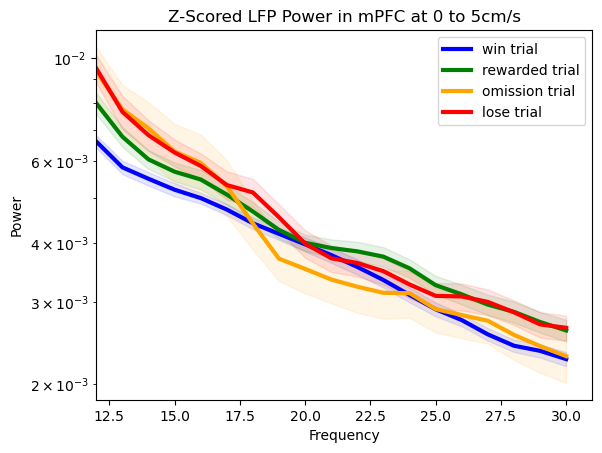

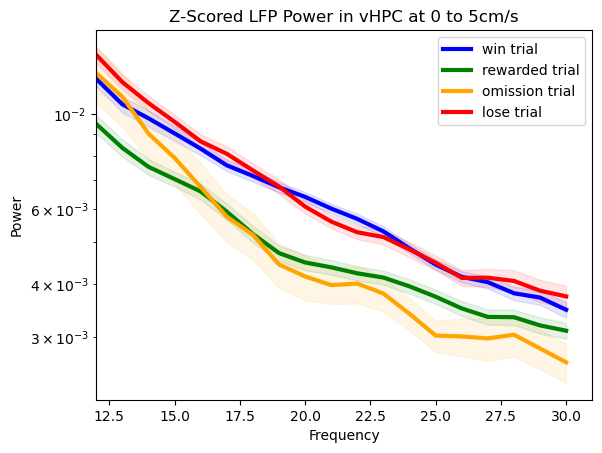

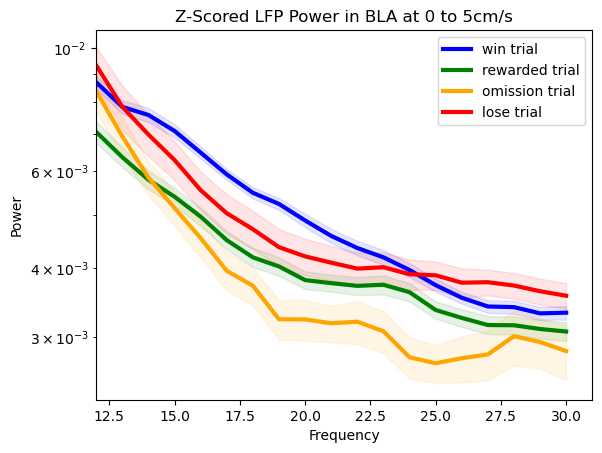

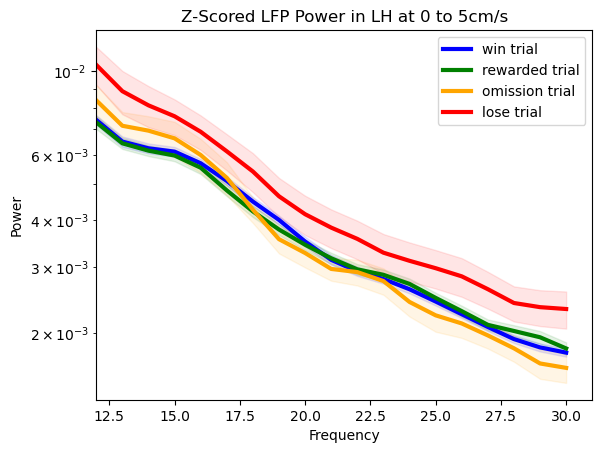

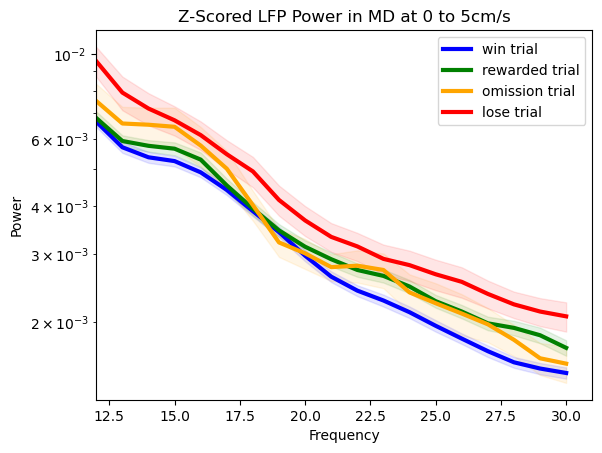

In [76]:
low_freq = 12
high_freq = 31
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

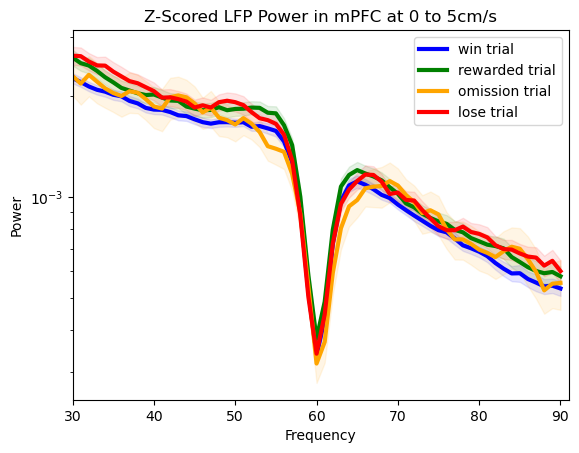

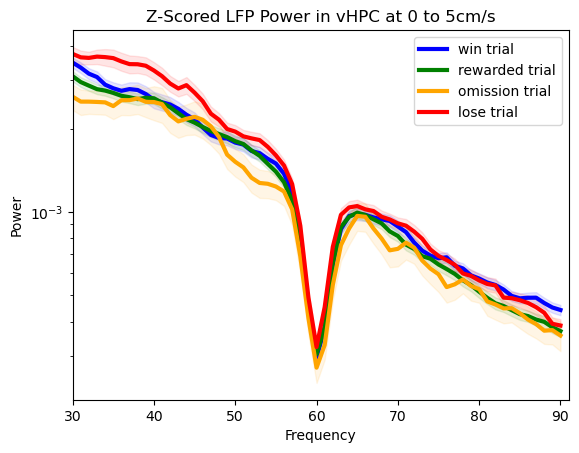

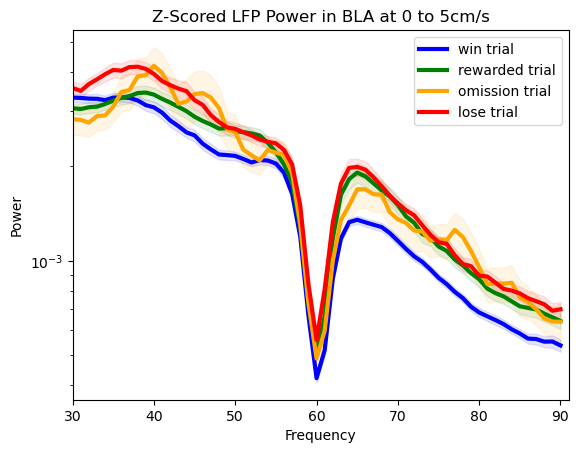

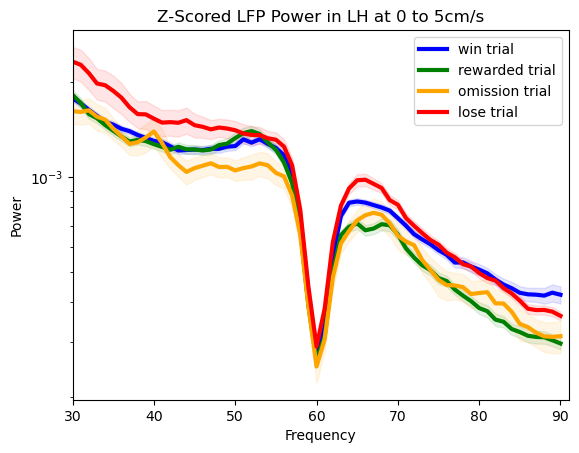

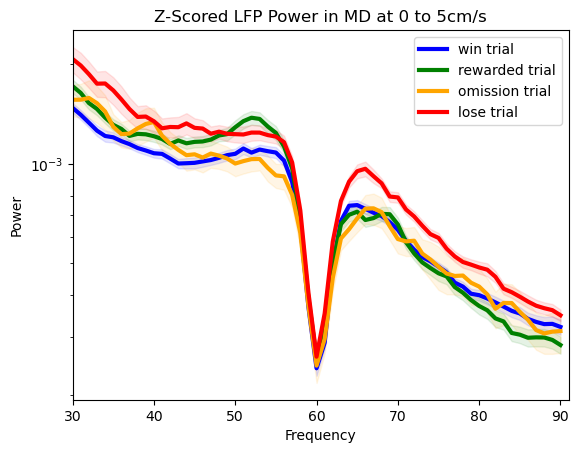

In [77]:
low_freq = 30
high_freq = 91
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

# Exporting that data

In [ ]:
MERGED_LFP_AND_SLEAP.columns

In [ ]:
exported_lfp_and_sleap = MERGED_LFP_AND_SLEAP.drop(columns=trace_columns, errors="ignore").copy()
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "multitaper" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "thorax_velocity" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "frequencies" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "windowed_power" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "connectivity" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "spike_interface" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "index" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "stamp" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "box" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "height" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "width" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "ratio" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "width" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=['individual_subj',
 'all_subj',
 'recording_name',
 'track_names',
 'subject_id',
 'corner_path',
 'corner_parts',
 'rescaled_locations',
 'reward_port'], errors="ignore")

In [ ]:
exported_lfp_and_sleap["frequencies"] = [MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"].iloc[0] for _ in range(len(exported_lfp_and_sleap))] 

In [ ]:
exported_lfp_and_sleap.columns

In [ ]:
exported_lfp_and_sleap.to_pickle("./proc/rce_lfp_power_and_velocity_region_col_baselinetrial_row.pkl")

In [ ]:
exported_lfp_and_sleap

# Reformatting the data

In [ ]:
window_averaged_power_columns

In [ ]:
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "all_window" in col], errors="ignore")


In [ ]:
exported_lfp_and_sleap = pd.melt(exported_lfp_and_sleap, value_vars=window_averaged_power_columns, value_name="power", id_vars=[col for col in exported_lfp_and_sleap.columns if col not in window_averaged_power_columns], var_name="region_and_baseline_or_trial")



In [ ]:
exported_lfp_and_sleap["brain_region"] = exported_lfp_and_sleap["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [ ]:
exported_lfp_and_sleap["trial_or_baseline"] = exported_lfp_and_sleap["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [ ]:
exported_lfp_and_sleap.head()

In [ ]:
exported_lfp_and_sleap["all_theta_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[4:13])
exported_lfp_and_sleap["all_beta_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[13:31])
exported_lfp_and_sleap["all_gamma_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[30:91])
exported_lfp_and_sleap["mean_theta_power"] = exported_lfp_and_sleap["all_theta_power"].apply(lambda x: x.mean())
exported_lfp_and_sleap["mean_beta_power"] = exported_lfp_and_sleap["all_beta_power"].apply(lambda x: x.mean())
exported_lfp_and_sleap["mean_gamma_power"] = exported_lfp_and_sleap["all_gamma_power"].apply(lambda x: x.mean())

In [ ]:
exported_lfp_and_sleap.head()

In [ ]:
exported_lfp_and_sleap.to_pickle("./proc/rce_velocity_parsed_power_spectra_region_and_baselinetrial_rows.pkl")